In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Titanic_train.csv")

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


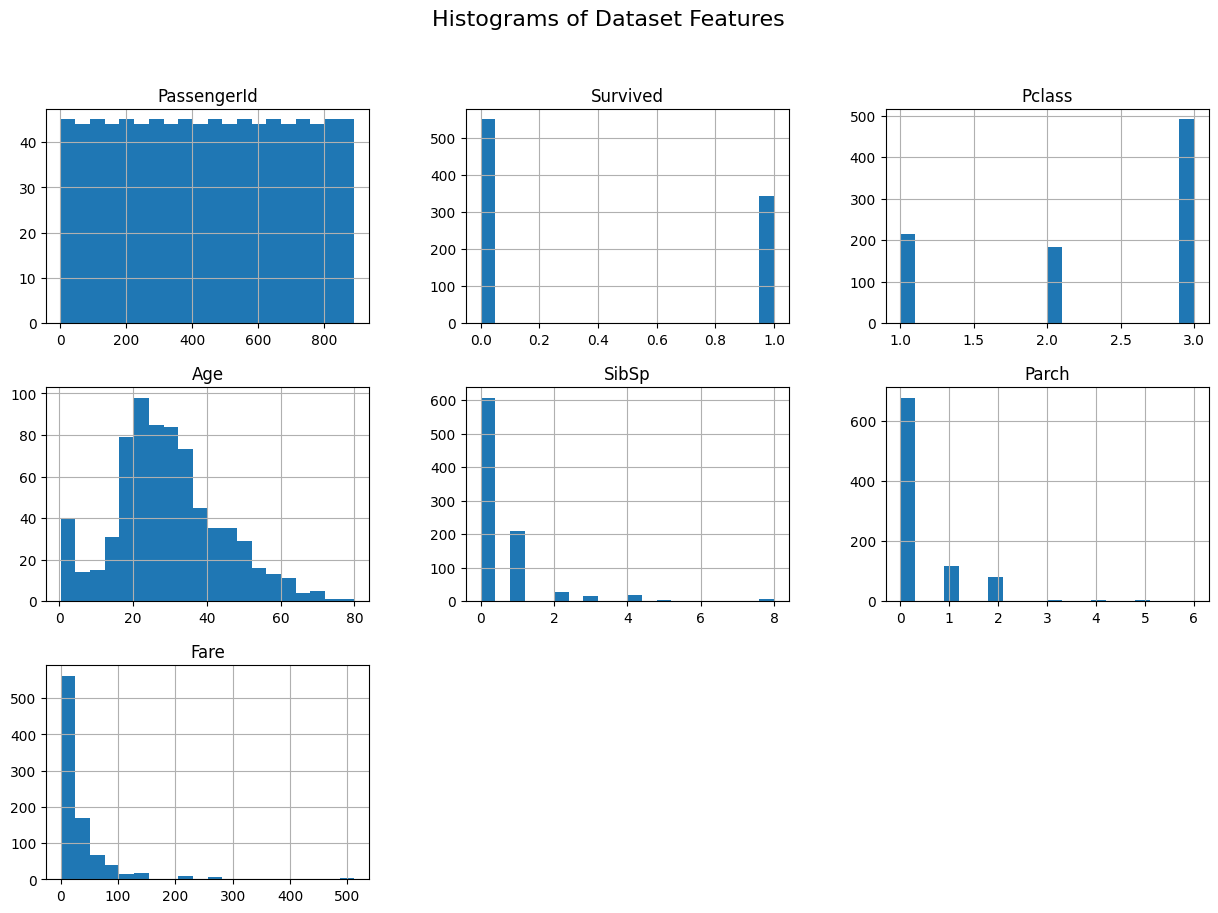

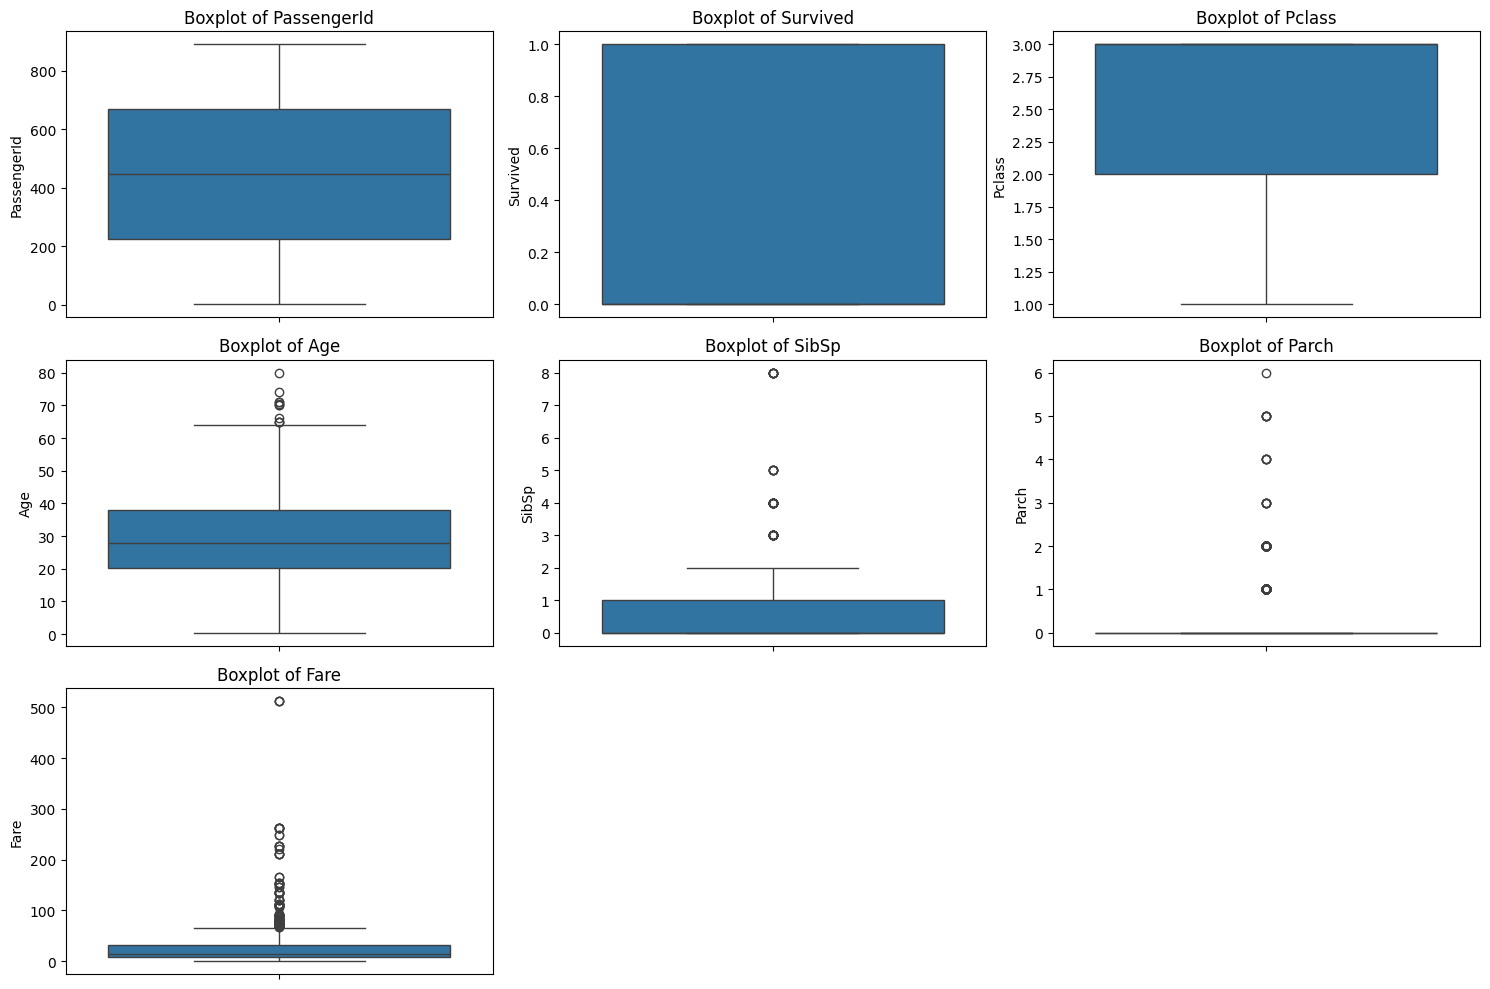

In [3]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Dataset Features", fontsize=16)
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


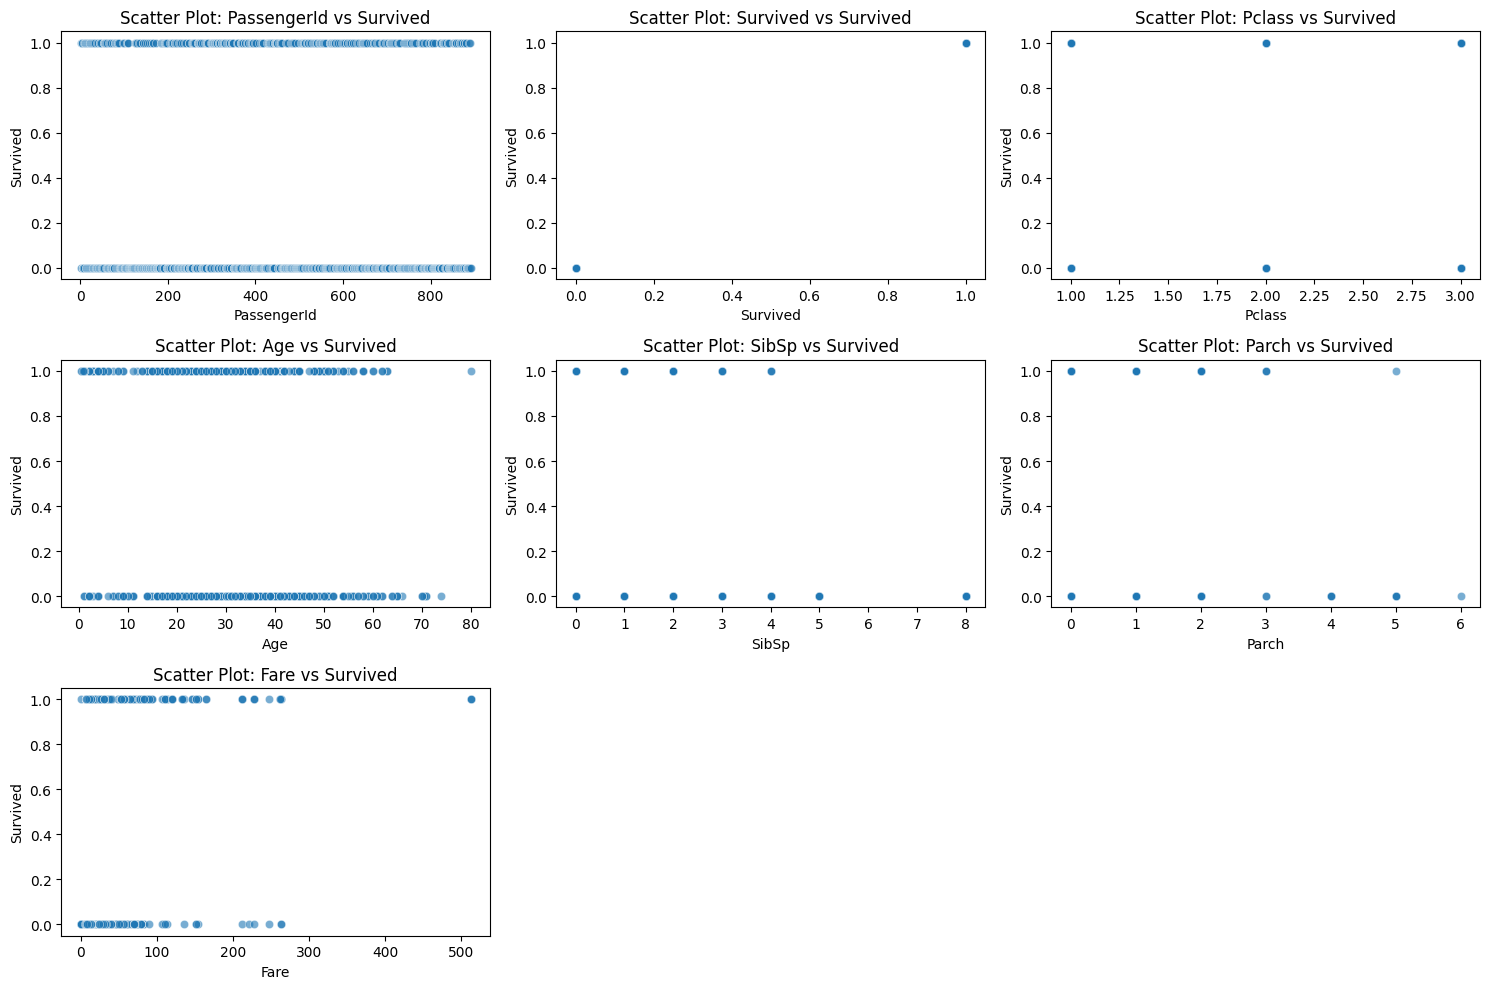

C:\Users\Admin\AppData\Local\Temp\ipykernel_12488\3120930481.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


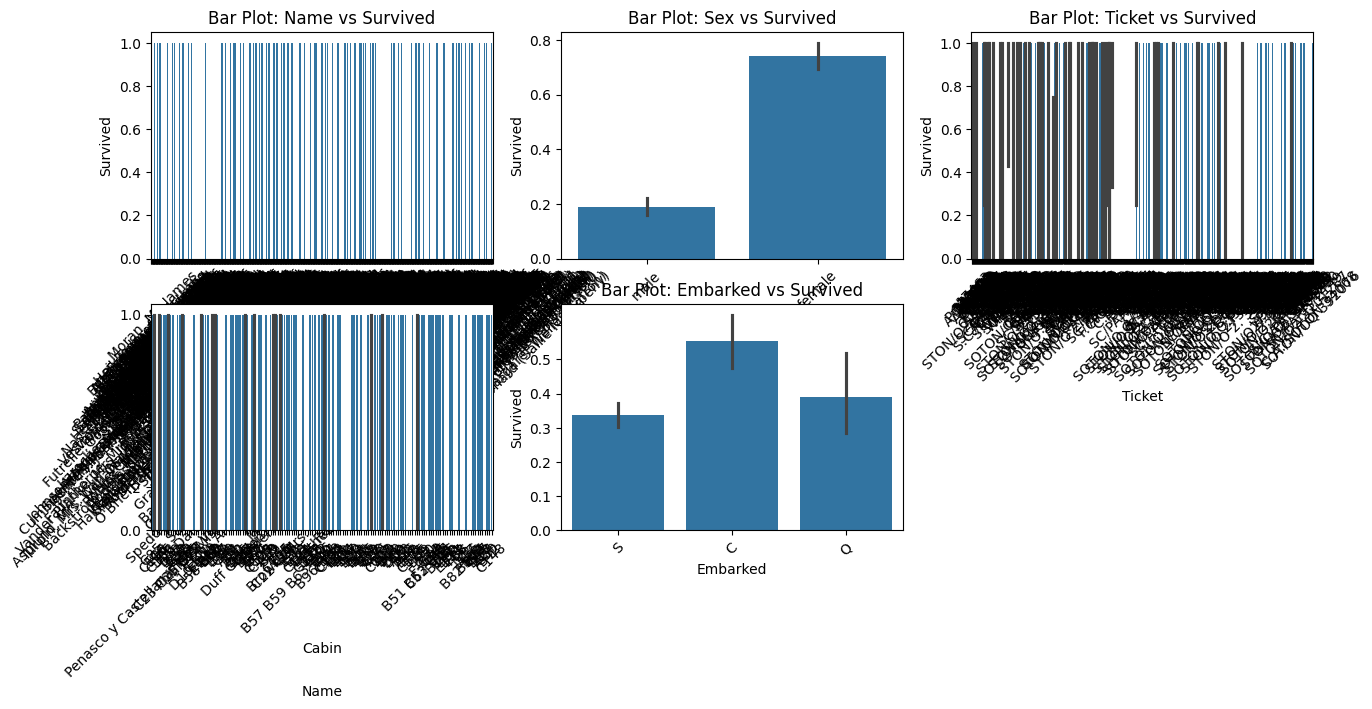

In [4]:
plt.figure(figsize=(15, 10))

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=feature, y='Survived', alpha=0.6)
    plt.title(f"Scatter Plot: {feature} vs Survived")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=df, x=feature, y='Survived')
    plt.title(f"Bar Plot: {feature} vs Survived")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_12488\2862335149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12488\2862335149.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [6]:
# Check for categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables in the dataset:", list(categorical_variables))


Categorical variables in the dataset: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [7]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for column in ['Sex', 'Embarked', 'Cabin']:
    df[column] = label_encoder.fit_transform(df[column])

df.drop(['Name', 'Ticket'], axis=1, inplace=True)

print("Encoded dataset sample:\n", df.head())


Encoded dataset sample:
    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  \
0            1         0       3    1  22.0      1      0   7.2500      8   
1            2         1       1    0  38.0      1      0  71.2833      2   
2            3         1       3    0  26.0      0      0   7.9250      8   
3            4         1       1    0  35.0      1      0  53.1000      2   
4            5         0       3    1  35.0      0      0   8.0500      8   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 9) (712,)
Testing set shape: (179, 9) (179,)


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model predictions
def evaluate_model(y_true, y_pred):
    print("Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))


In [13]:
import lightgbm as lgb
import xgboost as xgb

lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)


xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

print("\nLightGBM Model Performance:")
evaluate_model(y_test, lgb_y_pred)

print("\nXGBoost Model Performance:")
evaluate_model(y_test, xgb_y_pred)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:45:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



LightGBM Model Performance:
Evaluation Metrics:
Accuracy: 0.7206703910614525
Precision: 0.6417910447761194
Recall: 0.6231884057971014
F1-score: 0.6323529411764706

XGBoost Model Performance:
Evaluation Metrics:
Accuracy: 0.7374301675977654
Precision: 0.671875
Recall: 0.6231884057971014
F1-score: 0.6466165413533834


In [14]:
from sklearn.model_selection import GridSearchCV, cross_val_score


lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'max_depth': [5, 7, 10]
}


lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lgb_grid_search.fit(X_train, y_train)


print("\nBest parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best cross-validation score for LightGBM:", lgb_grid_search.best_score_)

lgb_cv_score = cross_val_score(lgb_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("\nLightGBM Cross-validation accuracy scores:", lgb_cv_score)
print("Mean cross-validation accuracy for LightGBM:", lgb_cv_score.mean())


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [26]:
# Function to evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    print("Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))

# Evaluate performance of LightGBM
print("\nLightGBM Model Performance:")
lgb_y_pred = lgb_model.predict(X_test)
evaluate_model(y_test, lgb_y_pred)

# Evaluate performance of XGBoost
print("\nXGBoost Model Performance:")
xgb_y_pred = xgb_model.predict(X_test)
evaluate_model(y_test, xgb_y_pred)



LightGBM Model Performance:
Evaluation Metrics:
Accuracy: 0.7206703910614525
Precision: 0.6417910447761194
Recall: 0.6231884057971014
F1-score: 0.6323529411764706

XGBoost Model Performance:
Evaluation Metrics:
Accuracy: 0.7374301675977654
Precision: 0.671875
Recall: 0.6231884057971014
F1-score: 0.6466165413533834



LightGBM Model Performance:
Evaluation Metrics:
Accuracy: 0.7206703910614525
Precision: 0.6417910447761194
Recall: 0.6231884057971014
F1-score: 0.6323529411764706


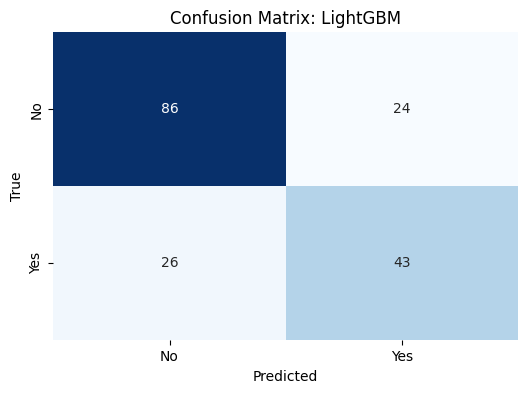

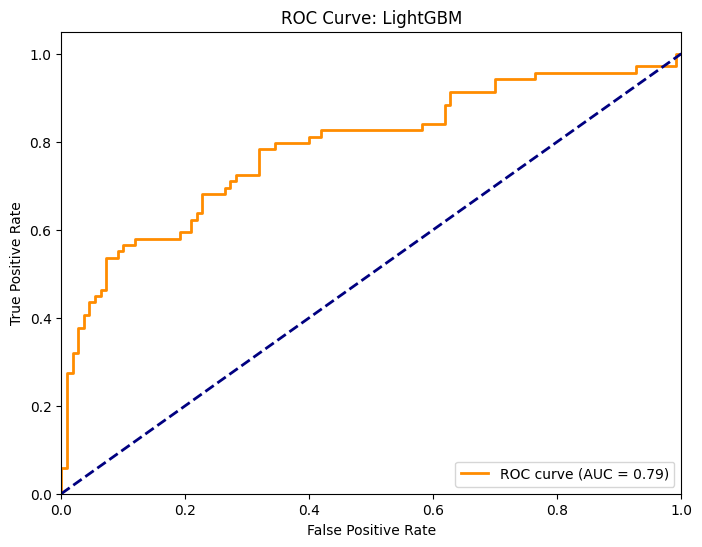


XGBoost Model Performance:
Evaluation Metrics:
Accuracy: 0.7374301675977654
Precision: 0.671875
Recall: 0.6231884057971014
F1-score: 0.6466165413533834


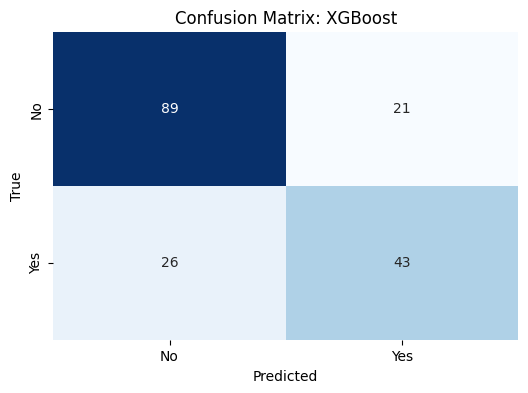

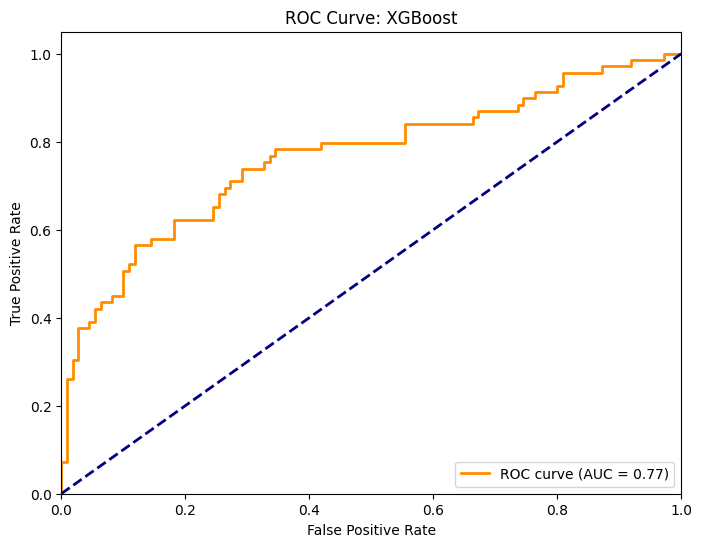

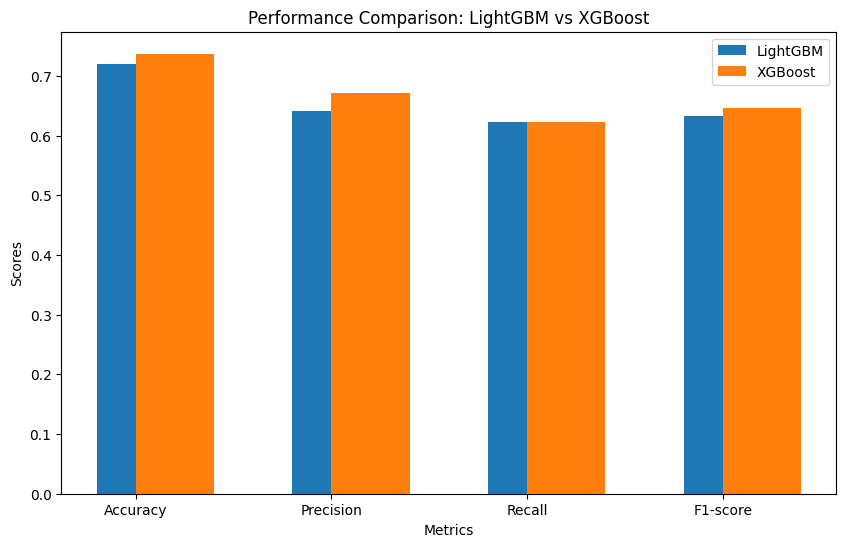

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend(loc="lower right")
    plt.show()


print("\nLightGBM Model Performance:")
lgb_y_pred = lgb_model.predict(X_test)
evaluate_model(y_test, lgb_y_pred)

plot_confusion_matrix(y_test, lgb_y_pred, "LightGBM")


lgb_y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  
plot_roc_curve(y_test, lgb_y_pred_proba, "LightGBM")


print("\nXGBoost Model Performance:")
xgb_y_pred = xgb_model.predict(X_test)
evaluate_model(y_test, xgb_y_pred)


plot_confusion_matrix(y_test, xgb_y_pred, "XGBoost")


xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1] 
plot_roc_curve(y_test, xgb_y_pred_proba, "XGBoost")


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lgb_metrics = [
    accuracy_score(y_test, lgb_y_pred),
    precision_score(y_test, lgb_y_pred),
    recall_score(y_test, lgb_y_pred),
    f1_score(y_test, lgb_y_pred)
]

xgb_metrics = [
    accuracy_score(y_test, xgb_y_pred),
    precision_score(y_test, xgb_y_pred),
    recall_score(y_test, xgb_y_pred),
    f1_score(y_test, xgb_y_pred)
]


plt.figure(figsize=(10, 6))
x = range(len(metrics))
plt.bar(x, lgb_metrics, width=0.4, label="LightGBM", align="center")
plt.bar(x, xgb_metrics, width=0.4, label="XGBoost", align="edge")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.xticks(x, metrics)
plt.legend()
plt.show()
